In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

data = fetch_california_housing(as_frame=True, return_X_y=True)
df, target = data[0], data[1] 
df = StandardScaler().fit_transform(df)

cv = KFold(n_splits=4, shuffle=True, random_state=6)

C:\Users\Kirill\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Kirill\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\Kirill\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from sklearn.linear_model import Ridge

model_lasso_1 = Ridge(alpha=1) 
model_lasso_2 = Ridge(alpha=10) 

pred_1 = cross_val_predict(model_lasso_1, df, target, cv=cv)
pred_2 = cross_val_predict(model_lasso_2, df, target, cv=cv)

In [3]:
pred_1

array([4.13156933, 3.98751819, 3.67278863, ..., 0.18719501, 0.32229781,
       0.49917648])

In [4]:
mse_1 = (pred_1 - target) ** 2
mse_2 = (pred_2 - target) ** 2

In [7]:
mse_1

0        0.155576
1        0.162021
2        0.023040
3        0.021454
4        1.025160
           ...   
20635    0.455104
20636    0.047616
20637    0.541409
20638    0.275312
20639    0.155886
Name: MedHouseVal, Length: 20640, dtype: float64

In [8]:
from scipy.stats import binom

N = mse_1.shape[0]
tN = (mse_1 > mse_2).sum()

binom(n=N, p=0.5).cdf(tN) * 2

5.015427635331782e-08

In [9]:
tN

9928

In [10]:
N

20640

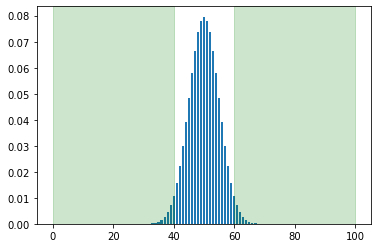

In [15]:
import  numpy as np
import matplotlib.pyplot as plt

N = 100
tN = 40
N_pos_available = np.arange(0, N + 1, 1)
probabilities = binom(n=N, p=0.5).pmf(N_pos_available)

plt.bar(N_pos_available, probabilities)
plt.axvspan(xmin=0, xmax=40, color='green', alpha=0.2)
plt.axvspan(xmin=60, xmax=N, color='green', alpha=0.2)
plt.show()

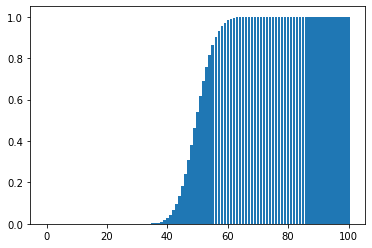

In [16]:
import  numpy as np
import matplotlib.pyplot as plt

N = 100
tN = 40
N_pos_available = np.arange(0, N + 1, 1)
probabilities = binom(n=N, p=0.5).cdf(N_pos_available)

plt.bar(N_pos_available, probabilities)
# plt.axvspan(xmin=0, xmax=40, color='green', alpha=0.2)
# plt.axvspan(xmin=60, xmax=N, color='green', alpha=0.2)
plt.show()

In [18]:
binom(n=100, p=0.5).cdf(60)

0.9823998998911476

In [19]:
sorted([7, 1, 5, 1, 3, 2, 5])

[1, 1, 2, 3, 5, 5, 7]

In [20]:
[7, 1.5, 5.5, 1.5, 4, 3, 5.5]

[7, 1.5, 5.5, 1.5, 4, 3, 5.5]

In [27]:
values = [sum(i) for i in [
    [1, 2] ,
    [1, 3],
    [1, 4],
    [1, 5],

    [2, 1],
    [2, 3],
    [2, 4],
    [2, 5],

    [3, 1],
    [3, 2],
    [3, 4],
    [3, 5],

    [4, 1],
    [4, 2],
    [4, 3],
    [4, 5],

    [5, 1],
    [5, 2],
    [5, 3],
    [5, 4]
]]
len([i for i in values if i >= 7])/ len(values)

0.4

In [28]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True, return_X_y=True)
df, target = data[0], data[1] 

In [29]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [30]:
target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [33]:
from scipy.stats import mannwhitneyu
import pandas as pd

new_df = pd.concat([df, target], axis=1)
age_le_30 = new_df[new_df.HouseAge <= 30]
age_g_30 = new_df[new_df.HouseAge > 30]

mannwhitneyu(x=age_le_30.MedInc, y=age_g_30.MedInc)

MannwhitneyuResult(statistic=59254034.5, pvalue=5.345198689020035e-50)

In [34]:
1 - (1 - 0.05) ** 10

0.4012630607616213

In [35]:
1 - (1 - 0.01) ** 12

0.11361512828387077